# Happiness and Income Analysis
**Abby Scarry and Nicole Davis**

[View Project](https://ascarry.github.io/)

**Dataset**

We have selected two datasets for this analysis. The first dataset comes from the World Happiness Report, which contains data on happiness scores (Life Ladder) and contributing factors such as Log GDP per capita, social support, life expectancy, freedom of choice, and more across many countries over time. This dataset is useful for exploring the relationship between different factors and reported happiness levels.

The second dataset includes additional indicators such as education quality, health quality, economic quality, and more, which will combine with the first dataset well to provide a full analysis of different factors and their association with happiness levels.

**Research Questions**

How do income, education, and healthcare indicators correlate with happiness levels across countries?

Which factors, economic or social, have the strongest predictive power for happiness within different countries?

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# Load dataset1
dataset1 = pd.read_csv('/content/drive/My Drive/DataScienceProject/Dataset1.csv')
# Drop unnamed/unecessarry column
dataset1 = dataset1.drop(columns=['Unnamed: 11'])
# Rename columns
dataset1.columns = [
    'Country',
    'Year',
    'Happiness Score',
    'Log GDP per Capita',
    'Social Support',
    'Life Expectancy',
    'Freedom of Choice',
    'Generosity',
    'Corruption Perception',
    'Positive Effect',
    'Negative Effect']
dataset1

,Country,Year,Happiness Score,Log GDP per Capita,Social Support,Life Expectancy,Freedom of Choice,Generosity,Corruption Perception,Positive Effect,Negative Effect
0,Afghanistan,2008,3.724,7.350,0.451,50.500,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.800,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.100,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.400,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.700,0.531,0.234,0.776,0.614,0.268
...,...,...,...,...,...,...,...,...,...,...,...
2358,Zimbabwe,2019,2.694,7.698,0.759,53.100,0.632,-0.051,0.831,0.658,0.235
2359,Zimbabwe,2020,3.160,7.596,0.717,53.575,0.643,0.003,0.789,0.661,0.346
2360,Zimbabwe,2021,3.155,7.657,0.685,54.050,0.668,-0.079,0.757,0.610,0.242
2361,Zimbabwe,2022,3.296,7.670,0.666,54.525,0.652,-0.073,0.753,0.641,0.191


In [4]:
print(dataset1.isnull().sum())

Country                    0
Year                       0
Happiness Score            0
Log GDP per Capita        28
Social Support            13
Life Expectancy           63
Freedom of Choice         36
Generosity                81
Corruption Perception    125
Positive Effect           24
Negative Effect           16
dtype: int64


In [5]:
# Interpolate missing values (trend)
dataset1['Log GDP per Capita'] = dataset1['Log GDP per Capita'].interpolate(method='linear')
# Use mean for other missing values
dataset1['Social Support'] = dataset1.groupby('Country')['Social Support'].transform(lambda x: x.fillna(x.mean()))
dataset1['Life Expectancy'] = dataset1.groupby('Country')['Life Expectancy'].transform(lambda x: x.fillna(x.mean()))
dataset1['Freedom of Choice'] = dataset1.groupby('Country')['Freedom of Choice'].transform(lambda x: x.fillna(x.mean()))
dataset1['Generosity'] = dataset1.groupby('Country')['Generosity'].transform(lambda x: x.fillna(x.mean()))
dataset1['Corruption Perception'] = dataset1.groupby('Country')['Corruption Perception'].transform(lambda x: x.fillna(x.mean()))
dataset1['Positive Effect'] = dataset1.groupby('Country')['Positive Effect'].transform(lambda x: x.fillna(x.mean()))
dataset1['Negative Effect'] = dataset1.groupby('Country')['Negative Effect'].transform(lambda x: x.fillna(x.mean()))

In [6]:
print(dataset1.isnull().sum())

Country                   0
Year                      0
Happiness Score           0
Log GDP per Capita        0
Social Support            1
Life Expectancy          50
Freedom of Choice         0
Generosity                9
Corruption Perception    30
Positive Effect           2
Negative Effect           1
dtype: int64


In [7]:
# Load dataset2
dataset2 = pd.read_csv('/content/drive/My Drive/DataScienceProject/Dataset2.csv')
# Get rid of white space in column name
dataset2['Country'] = dataset2['Country'].str.strip()
dataset2

,Country,AveragScore,SafetySecurity,PersonelFreedom,Governance,SocialCapital,InvestmentEnvironment,EnterpriseConditions,MarketAccessInfrastructure,EconomicQuality,LivingConditions,Health,Education,NaturalEnvironment
0,Denmark,84.55,92.59,94.09,89.45,82.56,82.42,79.64,78.79,76.81,95.77,81.07,87.48,73.94
1,Sweden,83.67,90.97,91.90,86.41,78.29,82.81,75.54,79.67,76.18,95.33,82.28,85.92,78.74
2,Norway,83.59,93.30,94.10,89.66,79.03,82.24,75.95,75.87,77.25,94.70,82.98,85.68,72.37
3,Finland,83.47,89.56,91.96,90.41,77.27,84.12,77.25,78.77,70.28,94.46,81.19,88.38,77.99
4,Switzerland,83.42,95.66,87.50,87.67,69.14,80.81,83.84,78.65,79.71,94.66,82.11,87.72,73.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Somalia,34.39,31.91,34.32,23.80,43.50,31.16,41.79,26.75,28.23,32.07,44.38,26.32,48.46
163,Afghanistan,34.18,20.93,31.02,29.47,31.17,30.25,42.01,29.67,33.75,39.74,50.91,27.11,44.11
164,Central African Republic,32.83,35.30,36.83,28.40,36.72,26.32,40.21,25.49,40.34,19.21,31.95,18.62,54.57
165,Yemen,32.65,22.60,25.30,18.20,38.44,22.76,33.12,30.93,28.81,41.58,57.45,28.12,44.49


In [8]:
# Pull the most recent data for each country in dataset1
dataset1_recent = dataset1.loc[dataset1.groupby('Country')['Year'].idxmax()]
dataset1_recent

,Country,Year,Happiness Score,Log GDP per Capita,Social Support,Life Expectancy,Freedom of Choice,Generosity,Corruption Perception,Positive Effect,Negative Effect
14,Afghanistan,2023,1.446,8.523000,0.368,55.20,0.228,0.056154,0.738,0.261,0.460
30,Albania,2023,5.445,9.689000,0.691,69.20,0.872,0.068000,0.855,0.597,0.314
41,Algeria,2022,5.538,9.323000,0.783,66.70,0.440,-0.045000,0.611,0.583,0.259
45,Angola,2014,3.795,9.010000,0.755,53.08,0.375,-0.173000,0.834,0.595,0.368
63,Argentina,2023,6.393,9.994000,0.892,67.30,0.832,-0.129000,0.846,0.720,0.301
...,...,...,...,...,...,...,...,...,...,...,...
2295,Venezuela,2023,5.765,7.948600,0.885,63.70,0.757,-0.101538,0.825,0.758,0.300
2313,Vietnam,2023,6.325,9.392000,0.845,65.70,0.956,-0.159000,0.655,0.710,0.120
2327,Yemen,2023,3.532,7.705333,0.825,56.60,0.583,-0.124250,0.771,0.447,0.341
2344,Zambia,2023,3.686,8.115000,0.664,56.10,0.854,0.092000,0.814,0.653,0.359


In [9]:
# Merge both datasets on countries present in both
combined_dataset = pd.merge(dataset1_recent, dataset2, on='Country', how='inner')
# Rename columns so more clear for analysis
combined_dataset.columns = [
    'Country',
    'Year',
    'Happiness Score',
    'Log GDP per Capita',
    'Social Support',
    'Life Expectancy',
    'Freedom of Choice',
    'Generosity',
    'Corruption Perception',
    'Positive Effect',
    'Negative Effect',
    'Average Score',
    'Safety & Security',
    'Personal Freedom',
    'Governance Quality',
    'Social Capital',
    'Investment Environment',
    'Enterprise Conditions',
    'Market Access & Infrastructure',
    'Economic Quality',
    'Living Conditions',
    'Health Quality',
    'Education Quality',
    'Natural Environment'
]
combined_dataset

,Country,Year,Happiness Score,Log GDP per Capita,Social Support,Life Expectancy,Freedom of Choice,Generosity,Corruption Perception,Positive Effect,...,Governance Quality,Social Capital,Investment Environment,Enterprise Conditions,Market Access & Infrastructure,Economic Quality,Living Conditions,Health Quality,Education Quality,Natural Environment
0,Afghanistan,2023,1.446,8.523000,0.368,55.20,0.228,0.056154,0.738,0.261,...,29.47,31.17,30.25,42.01,29.67,33.75,39.74,50.91,27.11,44.11
1,Albania,2023,5.445,9.689000,0.691,69.20,0.872,0.068000,0.855,0.597,...,48.44,47.47,55.17,54.87,61.57,45.44,76.17,73.95,70.07,58.64
2,Algeria,2022,5.538,9.323000,0.783,66.70,0.440,-0.045000,0.611,0.583,...,41.96,39.33,38.98,43.05,51.12,39.95,78.24,73.22,59.57,46.29
3,Angola,2014,3.795,9.010000,0.755,53.08,0.375,-0.173000,0.834,0.595,...,35.64,39.62,25.24,32.59,34.93,41.81,44.33,49.88,29.61,50.47
4,Argentina,2023,6.393,9.994000,0.892,67.30,0.832,-0.129000,0.846,0.720,...,49.52,63.30,49.45,45.28,55.01,41.86,82.08,74.45,69.25,60.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,Venezuela,2023,5.765,7.948600,0.885,63.70,0.757,-0.101538,0.825,0.758,...,13.09,58.30,21.69,20.50,43.34,26.44,69.82,69.61,61.10,62.22
147,Vietnam,2023,6.325,9.392000,0.845,65.70,0.956,-0.159000,0.655,0.710,...,47.86,65.97,45.24,52.52,63.00,60.33,71.80,76.99,66.56,52.09
148,Yemen,2023,3.532,7.705333,0.825,56.60,0.583,-0.124250,0.771,0.447,...,18.20,38.44,22.76,33.12,30.93,28.81,41.58,57.45,28.12,44.49
149,Zambia,2023,3.686,8.115000,0.664,56.10,0.854,0.092000,0.814,0.653,...,42.03,50.63,43.20,52.92,35.98,30.93,40.82,57.20,39.04,58.60


In [10]:
# Analyze missing values to determine how to fill them in
print(combined_dataset.isnull().sum())

Country                           0
Year                              0
Happiness Score                   0
Log GDP per Capita                0
Social Support                    1
Life Expectancy                   0
Freedom of Choice                 0
Generosity                        2
Corruption Perception             4
Positive Effect                   1
Negative Effect                   0
Average Score                     0
Safety & Security                 0
Personal Freedom                  0
Governance Quality                0
Social Capital                    0
Investment Environment            0
Enterprise Conditions             0
Market Access & Infrastructure    0
Economic Quality                  0
Living Conditions                 0
Health Quality                    0
Education Quality                 0
Natural Environment               0
dtype: int64


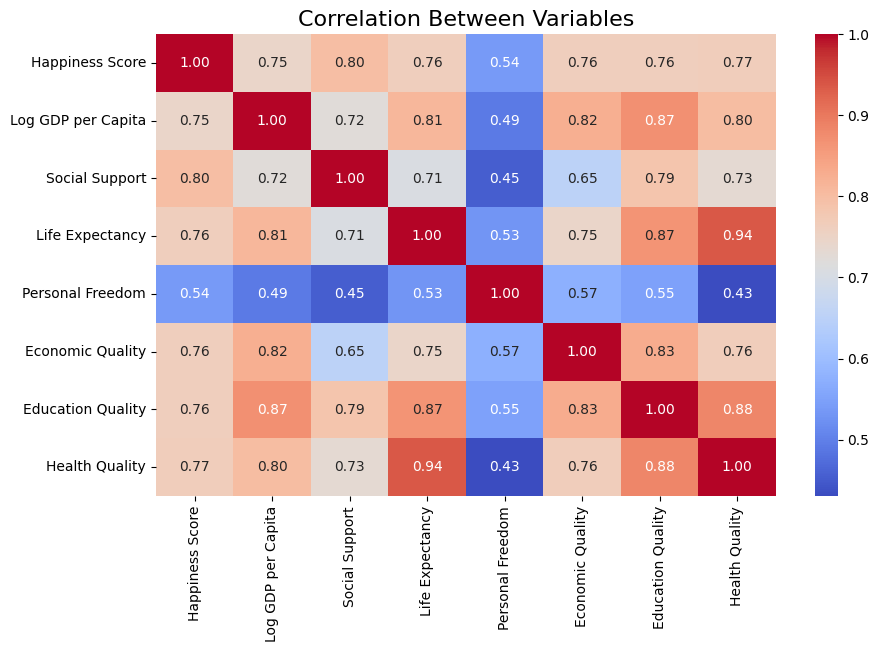

In [11]:
# Calculate the correlation coefficients between variables
correlation_matrix = combined_dataset[['Happiness Score', 'Log GDP per Capita', 'Social Support',
                                       'Life Expectancy', 'Personal Freedom', 'Economic Quality',
                                       'Education Quality',  'Health Quality']].corr()

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Between Variables', fontsize=16)
plt.show()

This heatmap reveals the correlation/relationship between happiness score and other variables. Happiness score has strong positive correlations with Social Support (0.80), Log GDP per Capita (0.75), Life Expectancy (0.76), Economic Quality (0.76), Education Quality (0.76), and Health Quality (0.77). This suggests that countries with better economic conditions, social systems, health, and education generally report higher happiness levels. This supports the idea that higher income levels are associated with higher happiness scores,but also highlights the many other factors that contribute to happiness. The strength of the correlation between social support and happiness score emphasizes that beyond income and money, social well-being is extremely important to general happiness. The social factors prove to be an equal if not more important contributor to happiness. Overall, these correlations imply that a combination of economic and social factors is necessary for happiness and to predict happiness accurately.

In [12]:
# Choropleth map to display Happiness Score for each country
# Warmer colors for high happiness score, cooler colors for low happiness score
# Blank spots for countries not included in data
fig = px.choropleth(
    combined_dataset,
    locations="Country",
    locationmode="country names",
    color="Happiness Score",
    hover_name="Country",
    title="Happiness Score by Country",
    color_continuous_scale=px.colors.sequential.Plasma
)

fig.update_layout(
    title_font_size=20,
    title_x=0.5,
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig.show()

This map shows the distribution of happiness scores by country, color-coded according to the scores (warmer colors with a higher score and cooler colors with a lower score). The map allows zoom in and can move with the mouse, also showing the numerical value for happiness scores when hovering over a specific country. This shows the regions where happiness scores tend to be larger and smaller. For example, high happiness scores seem to be concentrated in countries like North America and Europe while lower happiness scores can be seen in regions of Africa and Asia. This provides insights into where we should focus on identifying significant differences between social and eocnomic factors that may be causing these significant differences in happiness scores.

In [13]:
# Choropleth map to display GDP for each country
# Warmer colors for high GDP, cooler colors for low GDP
# Blank spots for countries not included in data
fig = px.choropleth(
    combined_dataset,
    locations="Country",
    locationmode="country names",
    color="Log GDP per Capita",
    hover_name="Country",
    title="Log GDP per Capita by Country",
    color_continuous_scale=px.colors.sequential.Plasma
)

fig.update_layout(
    title_font_size=20,
    title_x=0.5,
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig.show()

This map displays Log GDP per Capita by country. In order to visually display the similarities and differences in happiness scores versus GDP, we created the additional map in which the color gradient corresponds to GDP. Majority of regions with high happiness scores also have high log GDP per capita. Thi

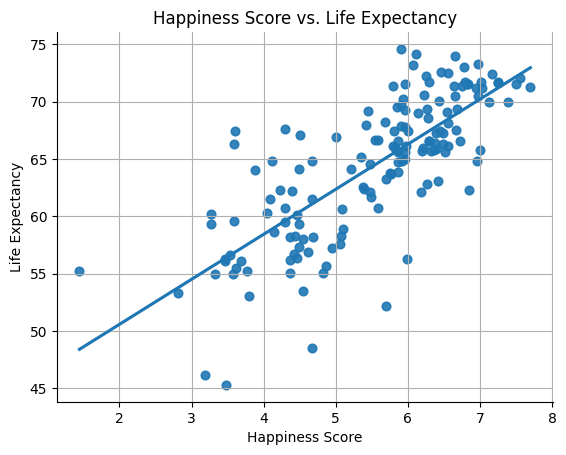

In [14]:
#Scatter plot comparing Happiness Score and Life Expectancy
from matplotlib import pyplot as plt
import seaborn as sns
happiness_scores = combined_dataset['Happiness Score'] #Define variables for ease of use of sns.regplot below
life_expectancies = combined_dataset['Life Expectancy']


combined_dataset.plot(kind='scatter', x='Happiness Score', y='Life Expectancy', s=40, alpha=.5) #Using the transformed dataset, use life expectancy on the y axis and the happiness score on y. Set s = 32 so the points are visible.
sns.regplot(x=happiness_scores, y=life_expectancies, scatter=True, ci=None)
plt.title('Happiness Score vs. Life Expectancy') #Title
plt.xlabel('Happiness Score') #x and y labels
plt.ylabel('Life Expectancy')
plt.grid(True) #Grid
plt.gca().spines[['top', 'right',]].set_visible(False) #Hide top and right spines for organization and clarity

This scatterplot shows the relationship between life expectancy and happiness score. We can observe a positive correlation meaning that with some exceptions, countries with higher life expectancies also reported higher happiness scores. Majority of the points are between 55-70 years old and happiness scores of 4-6. We can observe some variation around the trend line, suggesting that countries with similar life expectancies also show some spread in reported happiness levels.

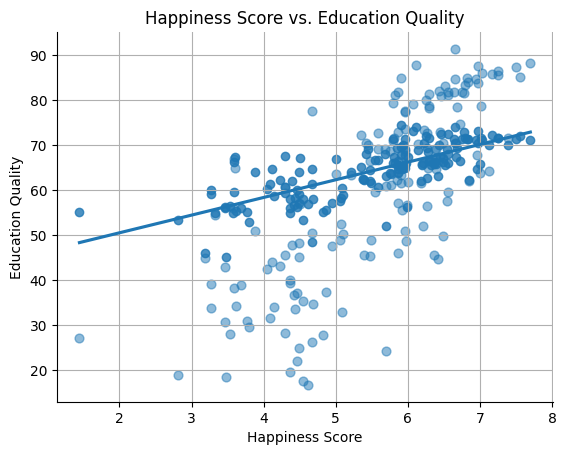

In [15]:
combined_dataset.plot(kind='scatter', x='Happiness Score', y='Education Quality', s=40, alpha=.5) #Using the transformed dataset, use life expectancy on the y axis and the happiness score on y. Set s = 32 so the points are visible.
sns.regplot(x=happiness_scores, y=life_expectancies, scatter=True, ci=None)
plt.title('Happiness Score vs. Education Quality') #Title
plt.xlabel('Happiness Score') #x and y labels
plt.ylabel('Education Quality')
plt.grid(True) #Grid
plt.gca().spines[['top', 'right',]].set_visible(False) #Hide top and right spines for organization and clarity

Happiness Score and Education Quality are compared in the scatterplot above. While we can observe a positive correlation, this trend is not particularly strong considering points are widely spread along the trend line suggesting variability. A cluster of points can be seen where happiness scores fall between 5-7 and education quality reporting between 60-75; this may represent a majority of countries at the average of both metrics. Outliers are apparent, representing countries that have either high reported education quality with low reported happiness scores, or low reported education and high happiness scores. This scatterplot suggests that generally, countries with higher education quality also report high happiness levels with some exceptions.

**Model Ideas**

One model idea is to create a regression model that can predict the happiness score of a country based on it's economic and social factors. This would help us to identify which factors are the most influential when it comes to predicting happiness and the extent to which economic vs. social factors contribute to a country's reported happiness.

Another model idea would be to group countries based on their economic and social factors (countries with similar factors grouped together) and then compare the group to their average happiness score. This would help show what combinations of different economic and social factors are resulting in a high or low happiness score.

In [16]:
%%shell
jupyter nbconvert --to html '/content/drive/My Drive/DataScienceProject/DataScienceProject_MS2.ipynb'

[NbConvertApp] Converting notebook /content/drive/My Drive/DataScienceProject/DataScienceProject_MS2.ipynb to html
[NbConvertApp] Writing 311943 bytes to /content/drive/My Drive/DataScienceProject/DataScienceProject_MS2.html
